In [6]:
import numpy as np
import pandas as pd
import random
from scipy.linalg import svd, diagsvd
import matplotlib.pyplot as plt
from funcoes import *

In [7]:

# Carrega os dados do arquivo CSV para um DataFrame do Pandas
df = pd.read_csv('archive/ratings_small.csv')

# Seleciona apenas as colunas 'userId', 'movieId' e 'rating' do DataFrame
df = df[['userId', 'movieId', 'rating']]

# Pivotagem da tabela para transformá-la em uma matriz de usuários por filmes
# onde os valores são as classificações
df = df.pivot_table(index='userId', columns='movieId', values='rating')

# Converte a matriz em um array NumPy, onde os valores NaN (não preenchidos)
# são representados como 2.5
A_nan = df.to_numpy()

# Preenche os valores NaN da matriz original com 2.5
A = df.fillna(2.5).to_numpy()

In [8]:
k = A_nan.shape[0] - 50  # Define o valor de k de acordo com os resultados do gráfico (se encontram no arquivo 'teste_100.ipynb')

resultados = []  # Lista para armazenar os resultados de reconstrução

# Repetir o processo 100 vezes para obter uma estimativa da eficácia do método
for _ in range(1000):
    # Criar uma nova matriz com ruído e extrair informações sobre o valor original
    B, valor_original, i, j = sistema(A, A_nan)
    
    # Reduzir o ruído da matriz usando a função de previsão com o valor de k determinado
    matriz_sem_ruido = previsao(B, k)
    
    # Calcular a diferença entre o valor original e o valor previsto na posição (i, j)
    resultados.append(valor_original - matriz_sem_ruido[i][j])

In [9]:
# Calcula a média do valor absoluto dos resultados de reconstrução
print(np.mean(np.abs(resultados)))

1.2503


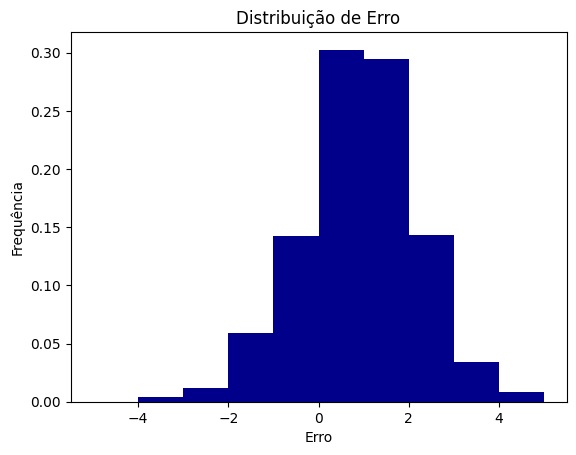

In [26]:
# Definir os intervalos desejados de bins de -5 a 5
bins = list(range(-5, 6))

# Plotar o histograma dos resultados de reconstrução
plt.hist(resultados, color='darkblue', bins=bins, density=True)  # Correção: density=True

# Adicionar rótulos e título
plt.xlabel('Erro')          # Rótulo do eixo x como 'Erro'
plt.ylabel('Frequência')    # Rótulo do eixo y como 'Frequência'
plt.title('Distribuição de Erro')  # Título do histograma como 'Distribuição de Erro'

# Exibir o histograma
plt.show()